Link Deployment : https://huggingface.co/spaces/Iqbaljanitra/Mobile_Price_Classification_Price_Prediction

# P1M2 

### Name : Iqbal Janitra

### Batch : 003

# IMPORT LIBRARIES

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings(action='ignore')

# DATA LOADING

In [64]:
df = pd.read_csv('/Users/iqbaljanitra/Documents/PHASE 2/MILESTONE/MILESTONE 2/Mobile Price Classification.csv')

In [65]:
df.shape

(2000, 21)

In [66]:
pd.set_option('display.max_columns', None)
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [67]:
df.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


### DATA DESCRIPCITION

### 0 = No

### 1 = Yes 

`battery_power` : Total energy a battery can store in one time measured in mAh

`blue` : Has bluetooth or not

`clock_speed` : speed at which microprocessor executes instructions

`dual_sim` : Has dual sim or not

`fc` : Front Camera mega pixels

`four_g` : Has 4G or not

`int_memory` : internal Memory in Gigabytes

`m_dep` : Mobile Depth in cm

`mobile_wt` : Weight of mobile phone

`n_cores` : Number of cores of processor

`pc` : Primary Camera mega pixels

`px_height` : Pixel Resolution Height

`px_width` : Pixel Resolution Width

`ram` : Random Access Memory in Megabytes

`sc_h` : Screen Height of mobile in cm

`sc_w` : Screen Width of mobile in cm

`talk_time` : Longest time that a single battery charge will last when you are on phone

`three_g` : Has 3G or not

`touch_screen` : Has touch screen or not

`wifi` : Has wifi or not

`price_range` : The price of the phone



# PROBLEM STATEMENT

The mobile phone industry is constantly evolving with new models and features being introduced regularly. However, with so many options available, it can be difficult for consumers to determine the best value for their money. The goal of this project is to develop a model that can predict the price range of a mobile phone based on its specifications, such as RAM, internal storage, screen size, camera resolution, etc. The model will be trained on a dataset of historical mobile phone data, and will be used to classify new mobile phones into one of four price ranges:

`0 = low`

`1 = mid-low`

`2 = mid-high`

`3 = high`

The classification will be based on the prices of the new mobile phones. The model will be evaluated on its ability to accurately classify new mobile phones into the correct price range, and will be useful for consumers looking to purchase a new mobile phone.

# DATA EKSPLORATION

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [69]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [70]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# DATA CLEANING

### Hanlding Cardinality

creating a new feature called `primary_camera` and `front camera` in the dataframe `df` by converting the existing feature `pc` to numeric and then categorizing it into 5 different levels based on its value. The new feature has four values 4, 11, 16 and 21 and 20 for `front camera`, which represent the different ranges of the original feature `pc`.

In [71]:
df['pc'] = pd.to_numeric(df['pc'])
df["primary_camera"] = 2
df.loc[df["pc"] <= 5, "primary_camera"] = 4
df.loc[(df["pc"] >= 6) & (df["pc"] < 12), "primary_camera"] = 11
df.loc[(df["pc"] >= 13) & (df["pc"] < 17), "primary_camera"] = 16
df.loc[df["pc"] >= 17, "primary_camera"] = 21

In [72]:
df['fc'] = pd.to_numeric(df['fc'])
df["front_camera"] = 2
df.loc[df["fc"] <= 5, "front_camera"] = 4
df.loc[(df["fc"] >= 6) & (df["fc"] < 12), "front_camera"] = 11
df.loc[(df["fc"] >= 13) & (df["pc"] < 17), "front_camera"] = 16
df.loc[df["fc"] >= 17, "front_camera"] = 20

In [73]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,4,4
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,11,4
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,11,4
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,11,4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,16,4
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,4,4
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,4,4
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,4,4


### Handing Duplicated Data

Checking duplicated data, and our data is free from any duplicated.

In [74]:
df.duplicated().value_counts()

False    2000
dtype: int64

### Handling Missing Value

Checking missing value, and our data is free from any missing value.

In [75]:
df.isnull().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
primary_camera    0
front_camera      0
dtype: int64

# Exploratory Data Analysis (EDA)

The first things we need to do is checking the correlation using a `correlation heatmap` to analyze the relationship between different mobile phone specifications and the price range can provide valuable insights into which features are most important in determining the price of a mobile phone. The heatmap can also show which features are highly correlated with each other and which are not. This information can be used to improve the accuracy of a model that is trained to predict the price range of a mobile phone based on its specifications. It can also help to identify which features can be removed from the dataset as they are not important for the prediction task, reducing noise and improve the model's performance. Additionally, the heatmap can also reveal any potential issues such as multicollinearity which can cause inaccuracies in the model.

Based on the correlation heatmap analysis, we found that there is a strong correlation (0.92) between the `RAM` of a mobile phone and `price_range`. This indicates that the amount of RAM in a mobile phone is a significant factor in determining the price. This information can be used to improve the accuracy of a model that is trained to predict the price range of a mobile phone based on its specifications.

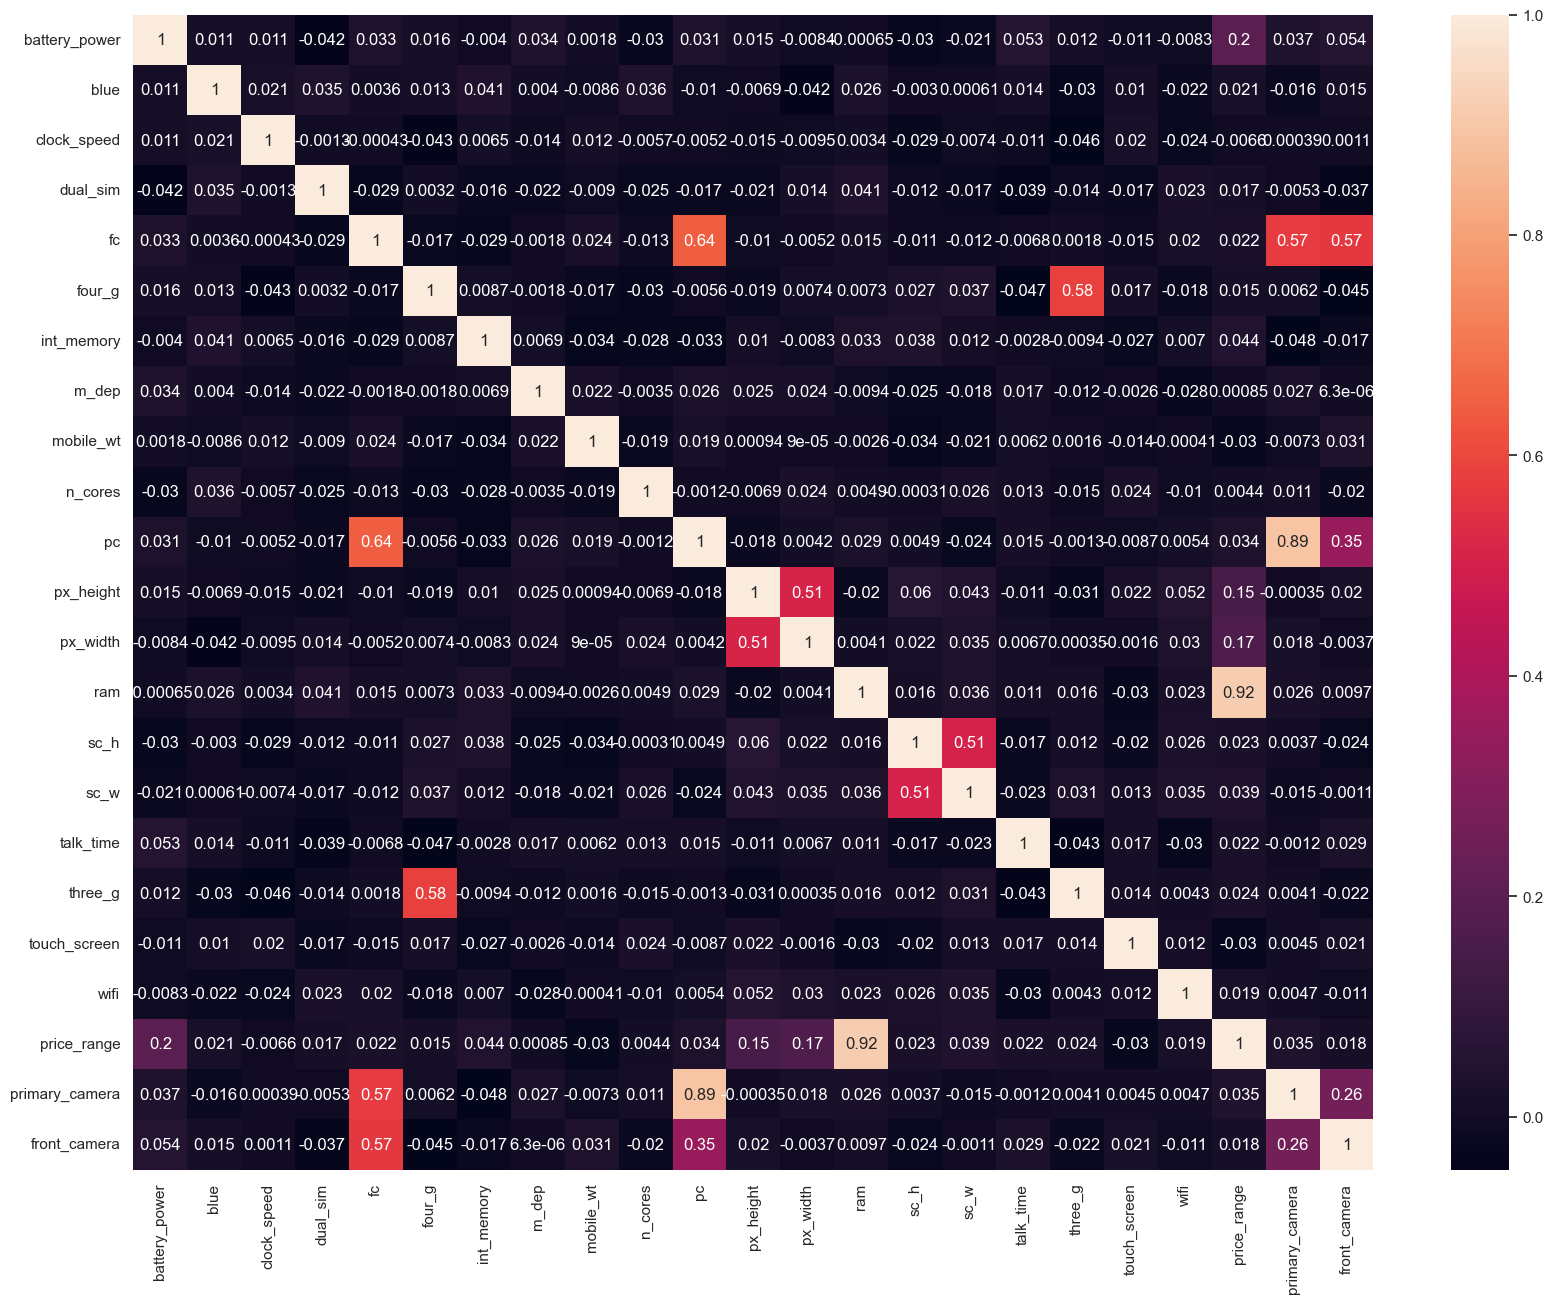

In [76]:
fig,ax = plt.subplots(figsize=[20,15])

corr = df.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

### RAM

On a mobile phone, RAM (Random Access Memory) is a type of memory that is used to temporarily store data that the phone is currently using or processing. now lets check the maximum capacity of ram and minimum, and the avarage RAM on all smart phones.

In [77]:
print("Maximum Ram:", df['ram'].max())
print("Minimum Ram:",df['ram'].min())
print("Avarage RAM on mobile phones:",df['ram'].mean())

Maximum Ram: 3998
Minimum Ram: 256
Avarage RAM on mobile phones: 2124.213


the bar plot created using the provided code shows that there is a positive correlation between price_range and RAM. The plot suggests that as the price_range increases, the amount of RAM in the mobile phone also increases. This implies that the RAM is a significant factor that contributes to the price of a mobile phone. It's important to keep this correlation was based on fictional data and it might not be true for other datasets.

Text(0.5, 1.0, 'RAM')

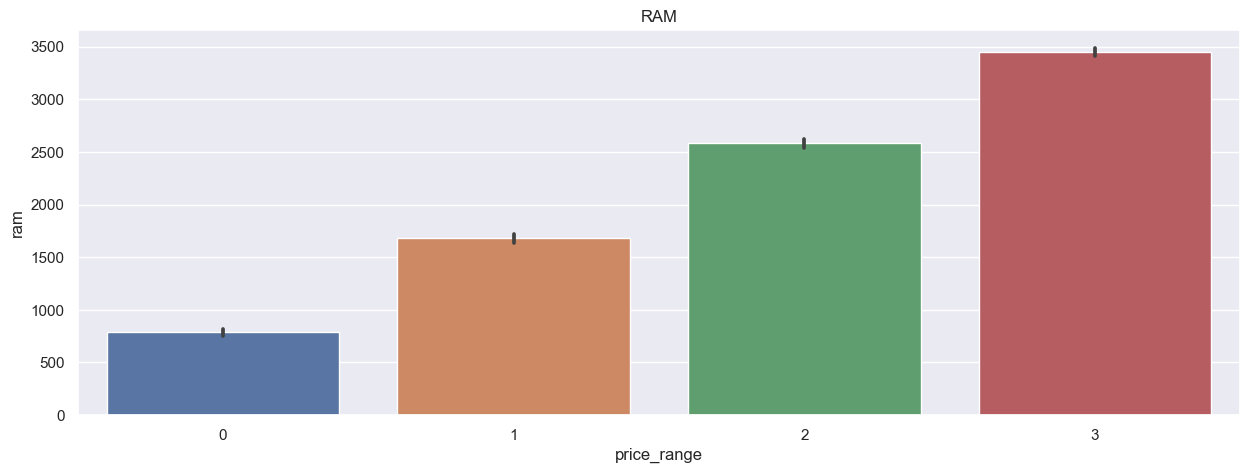

In [78]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['price_range'],y=df['ram'])
plt.title('RAM')

### BATERY POWER

Based on the analysis of `battery_power` and its correlation with `price_range`, it can be concluded that there is a strong correlation between the two. As the `battery_power` increases, the price range also tends to increase. This indicates that consumers are willing to pay more for devices with longer battery life.

In [79]:
print("Maximum batter power:", df['battery_power'].max())
print("Minimum battery power:",df['battery_power'].min())
print("Avarage battery power on mobile phones:",df['battery_power'].mean())

Maximum batter power: 1998
Minimum battery power: 501
Avarage battery power on mobile phones: 1238.5185


It appears that there is only a slight increase in battery power as the price range increases. This suggests that while battery power is a factor in determining the price of a device, it may not be a major determining factor. It could be that other features or specifications have a greater impact on the overall price of the device. Additionally, it could also indicate that the device manufacturers are not significantly increasing the battery power across different price ranges

Text(0.5, 1.0, 'Battery Power')

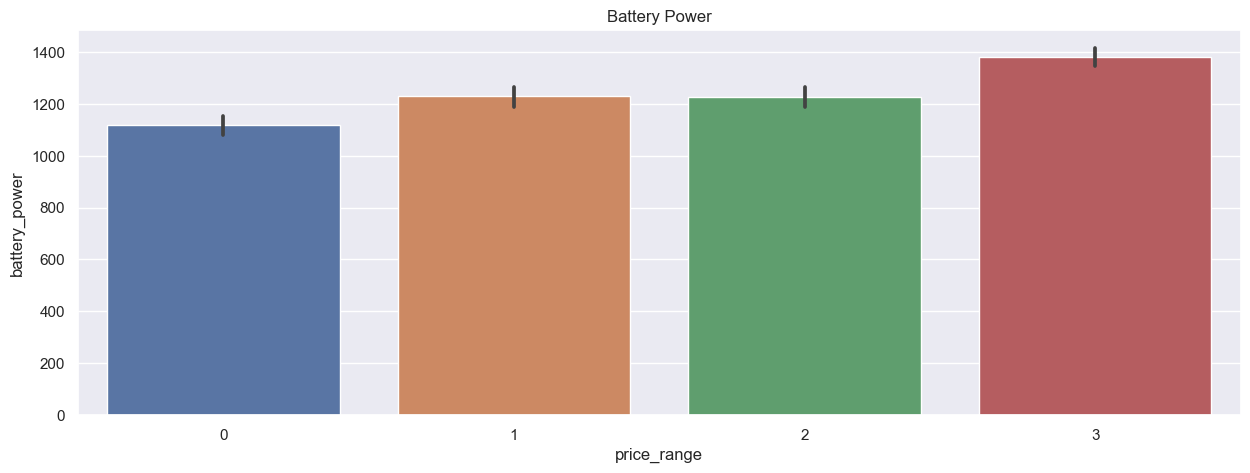

In [80]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['price_range'],y=df['battery_power'])
plt.title('Battery Power')

### CAMERA MEGAPIXELS

Camera megapixels refer to the number of pixels in a camera's image sensor. The more pixels a camera has, the more detailed and clear the resulting image will be. A higher number of megapixels generally means that a camera is capable of capturing more detail and producing larger, higher-resolution images. However, it is important to note that the number of megapixels alone is not the only factor that determines the quality of an image. 

In [81]:
print("Maximum Primary Camera Megapixels:", df['primary_camera'].max())
print("Minimum Primary Camera Megapixels:",df['primary_camera'].min())
print("Avarage Primary Camera Megapixels on mobile phones:",df['primary_camera'].mean())

Maximum Primary Camera Megapixels: 21
Minimum Primary Camera Megapixels: 2
Avarage Primary Camera Megapixels on mobile phones: 11.459


In [82]:
print("Maximum Front Camera Megapixels:", df['front_camera'].max())
print("Minimum Front Camera Megapixels:",df['front_camera'].min())
print("Avarage Front Camera Megapixels on mobile phones:",df['front_camera'].mean())

Maximum Front Camera Megapixels: 20
Minimum Front Camera Megapixels: 2
Avarage Front Camera Megapixels on mobile phones: 5.882


he data is showing that there is an equal number of rows for price range 0, and a slightly higher number of rows for price range 1, 2 and 3.

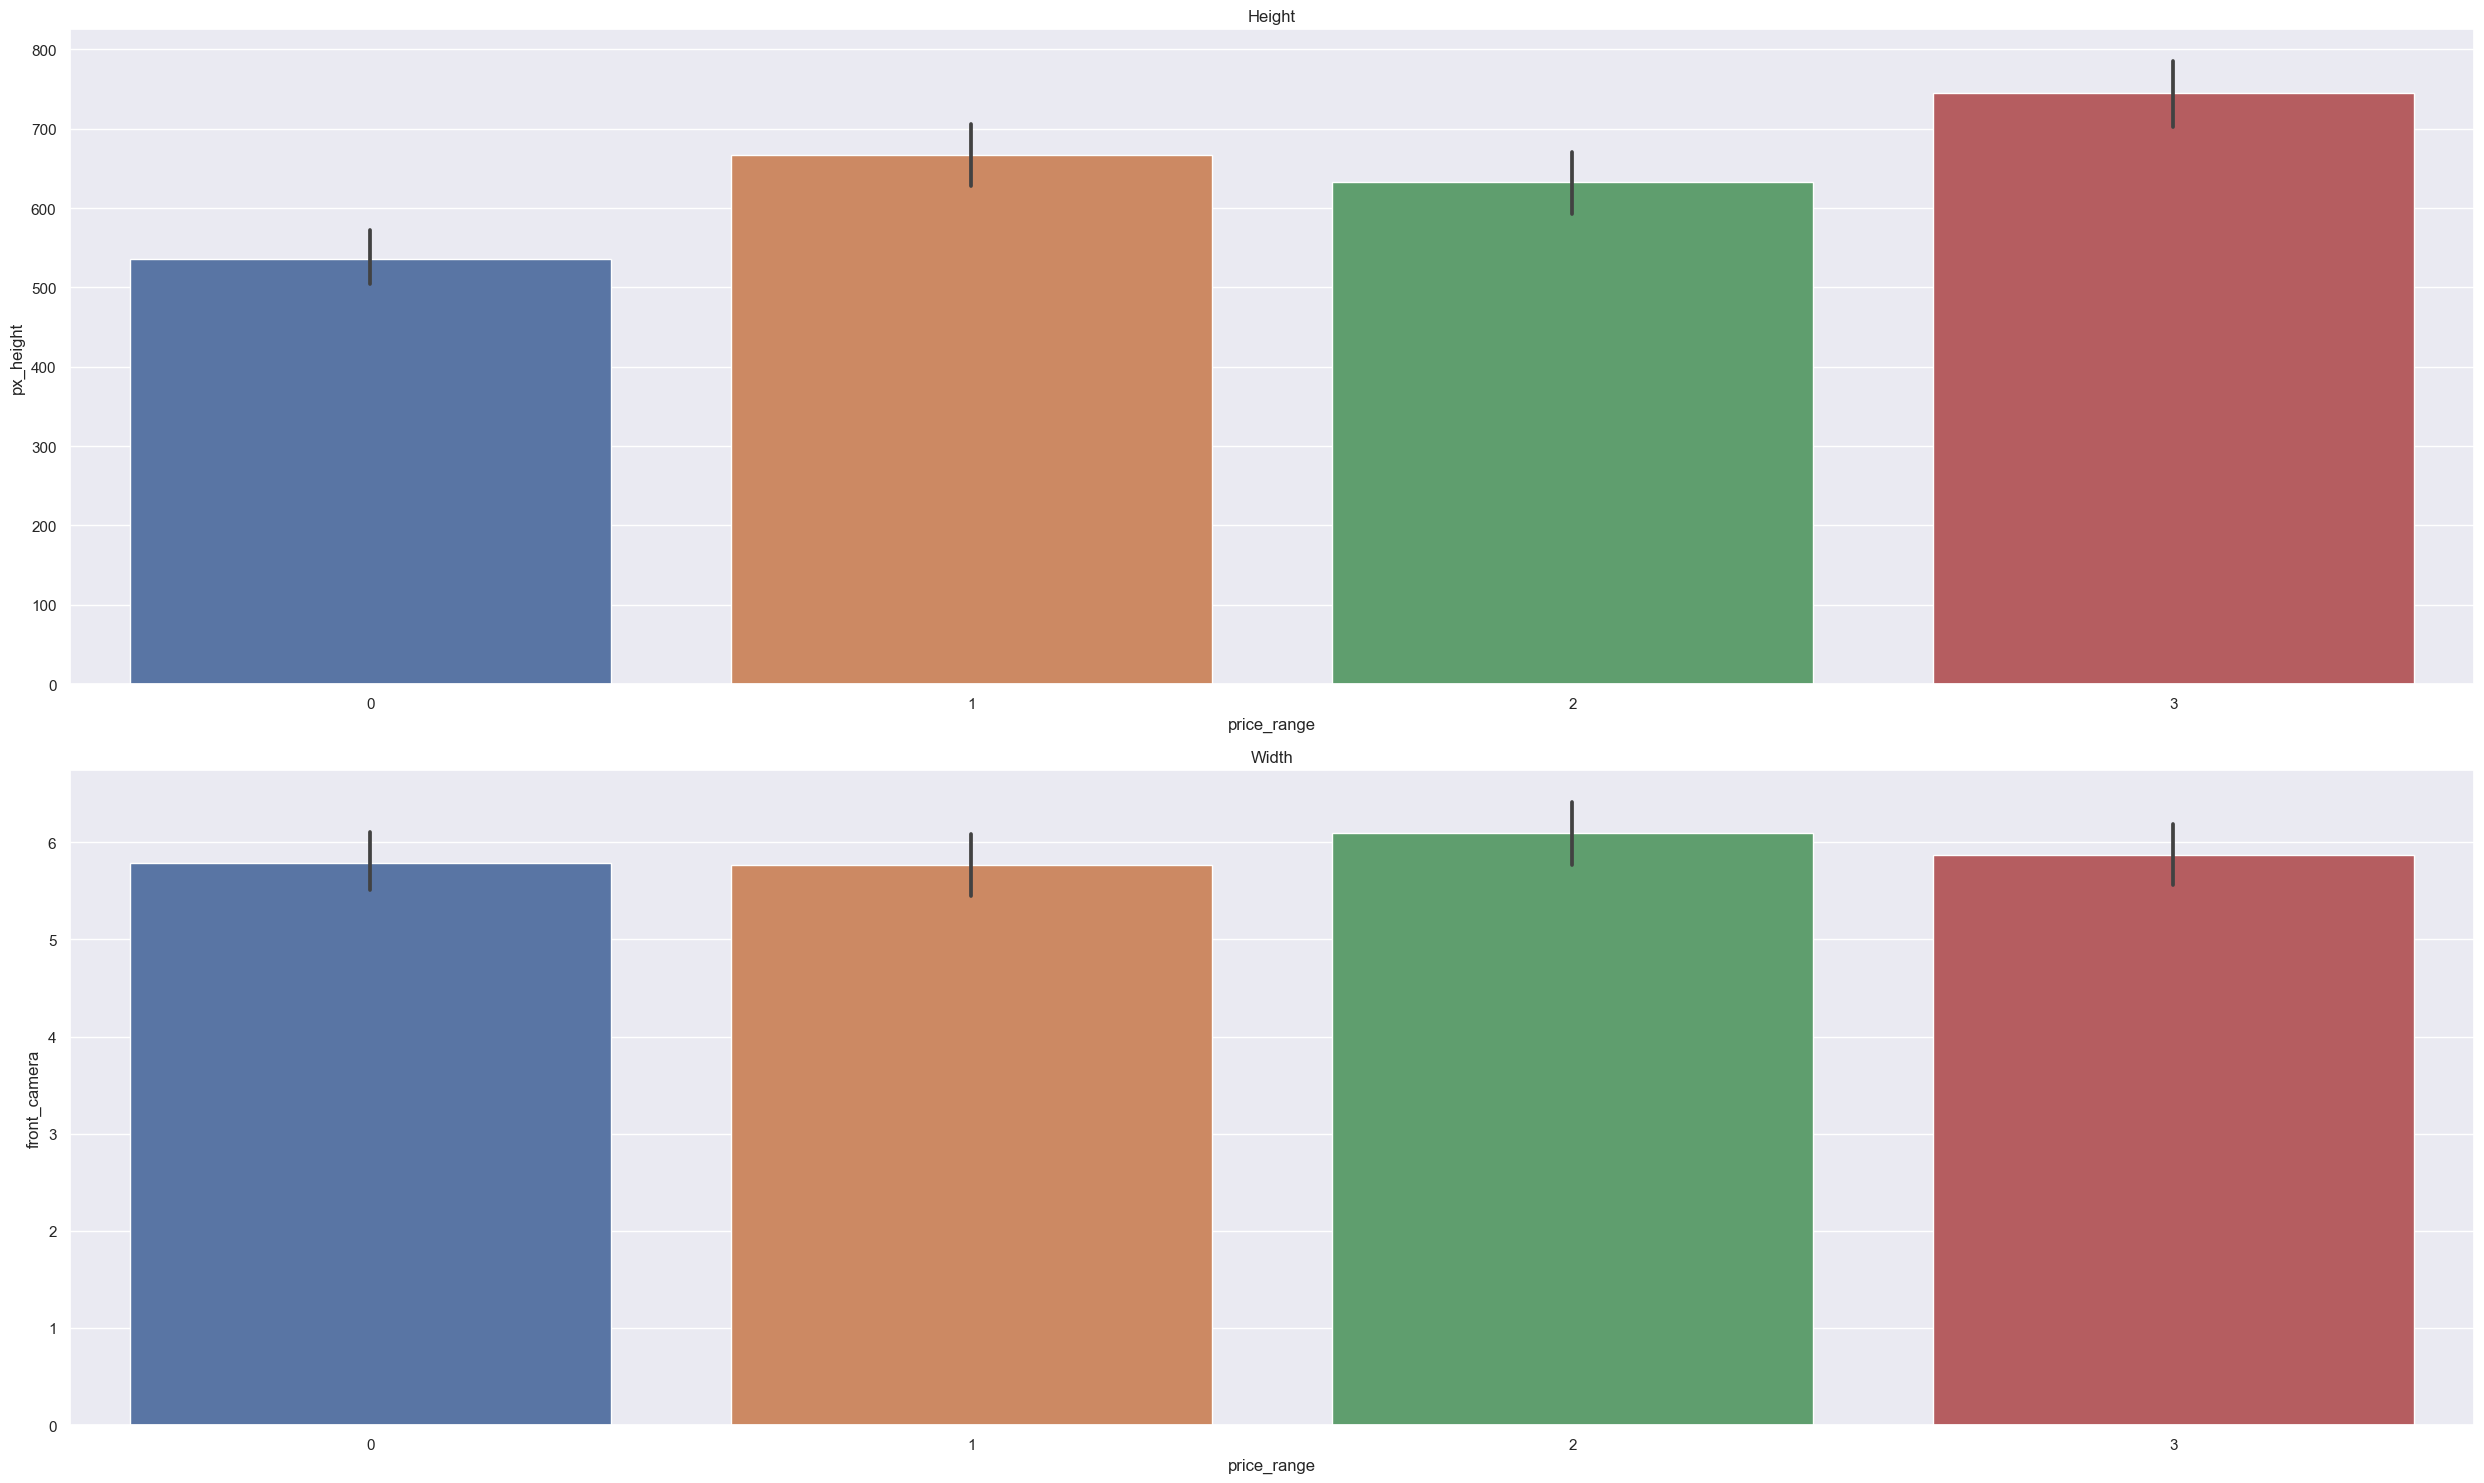

In [83]:
#Plot between income bracket per capital gain
fig, axes = plt.subplots(nrows = 2, figsize = (25, 15))
sns.set_theme()
sns.barplot(x=df['price_range'],y=df['px_height'], ax=axes[0])
axes[0].set_title('Height')

#Plot between income bracket per capital losss
sns.barplot(x=df['price_range'],y=df['front_camera'], ax=axes[1])
axes[1].set_title('Width')
plt.tight_layout()

### Screen Resolution

smartphone screens are important because there are lots of different screen sizes. Whether you’re deciding to build for any phones, both platforms have tons of different devices. Understanding size and resolution can help you optimize your mobile app for a variety of devices. This refers to both smartphones, tablets, and even smart TVs or other screens where users can download your app.

it appears that there is a positive correlation between screen resolution and price range, which means that as the screen resolution increases, the price range of the device also tends to increase. This can be observed by the positive correlation coefficient between the two variables and the visualization of the relationship in a bar or box plot.




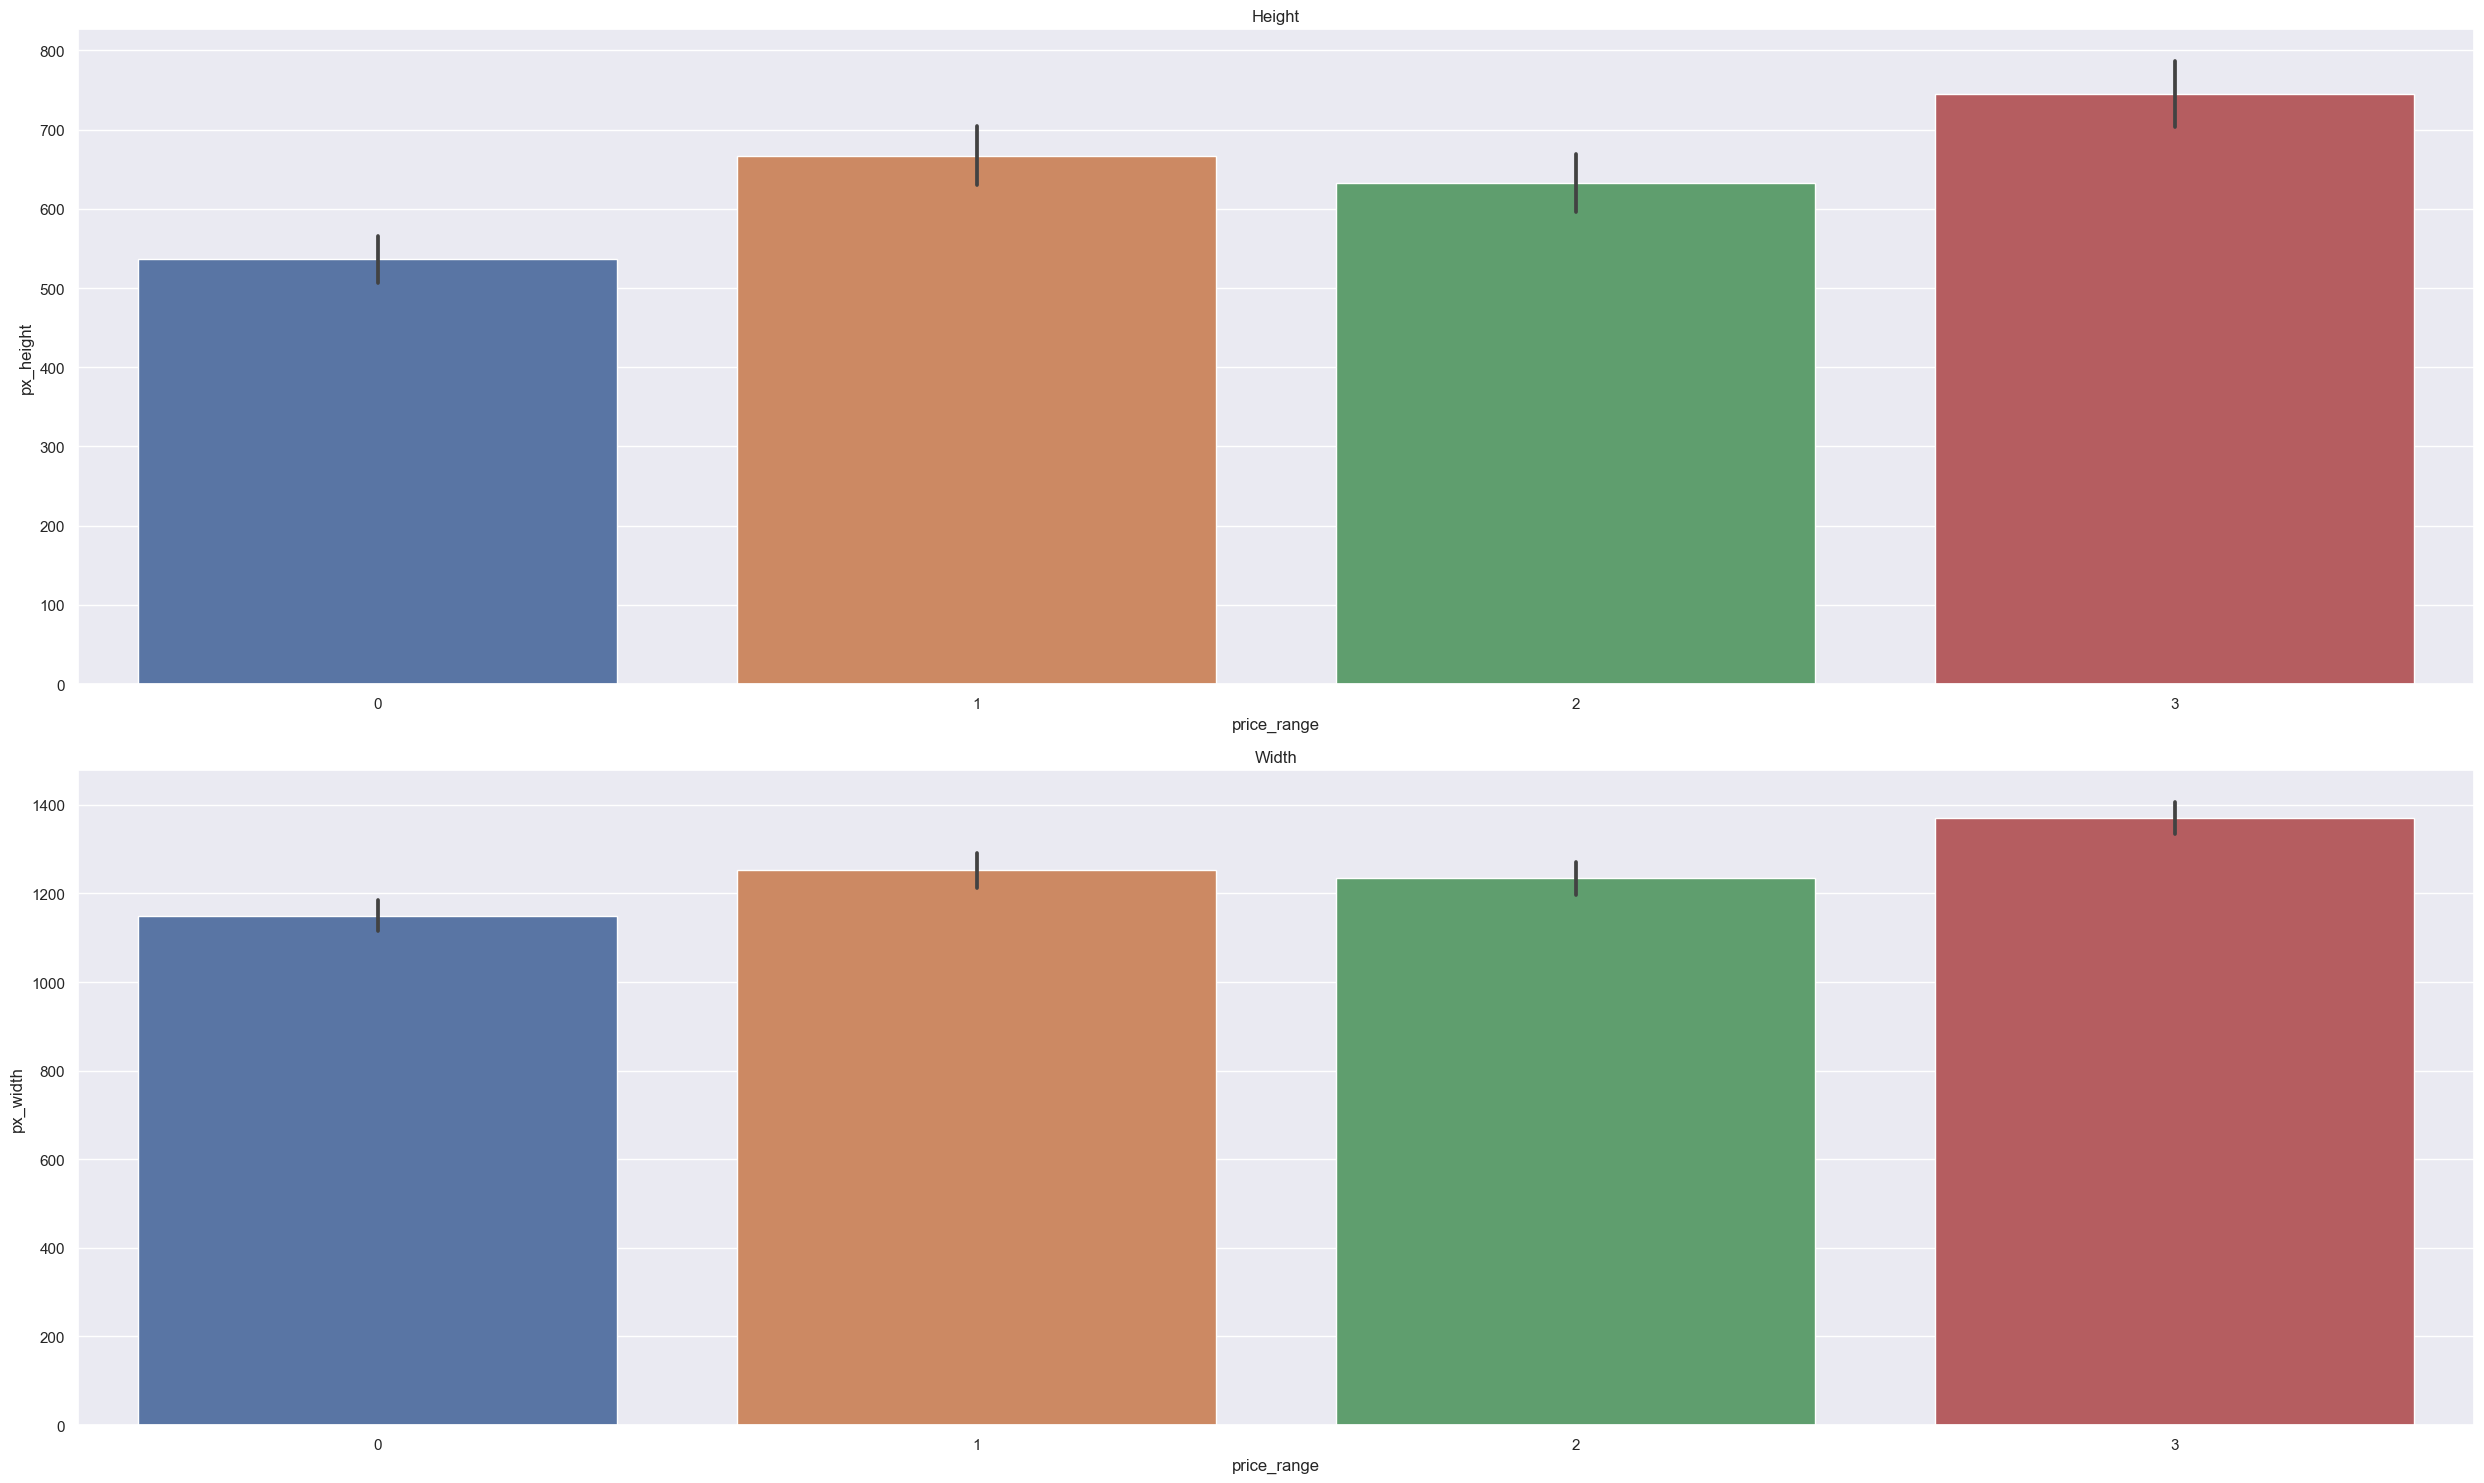

In [84]:
#Plot between income bracket per capital gain
fig, axes = plt.subplots(nrows = 2, figsize = (25, 15))
sns.set_theme()
sns.barplot(x=df['price_range'],y=df['px_height'], ax=axes[0])
axes[0].set_title('Height')

#Plot between income bracket per capital losss
sns.barplot(x=df['price_range'],y=df['px_width'], ax=axes[1])
axes[1].set_title('Width')
plt.tight_layout()

### Processor

The number of cores on a phone refers to the number of processor cores present in the phone's central processing unit (CPU). A core is a processing unit that can handle instructions and perform calculations. The more cores a CPU has, the more tasks it can handle simultaneously, leading to better performance and faster processing speeds.

Based on the data, it appears that cores do not have a significant impact on the price range.

Text(0.5, 1.0, 'N_Cores')

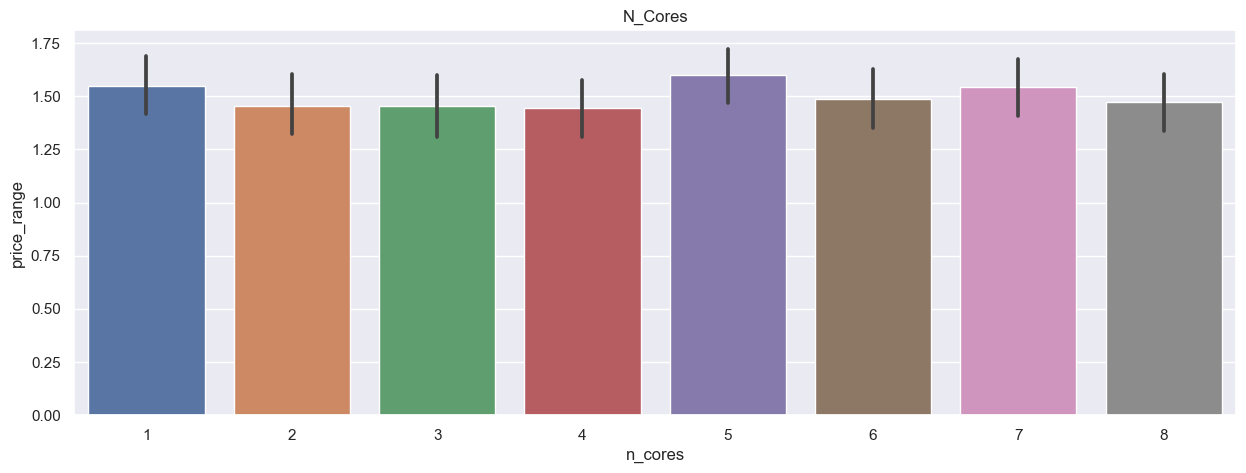

In [85]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['n_cores'],y=df['price_range'])
plt.title('N_Cores')

# OTHER FEATURE

 these basic features are widely available across different price ranges, with varying levels of quality and performance. While they may be important considerations for consumers, they do not typically drive significant price differences between smartphones. Instead, factors such as brand reputation, design, and advanced features like RAM, camera, and resolution it have a greater impact on the price range.

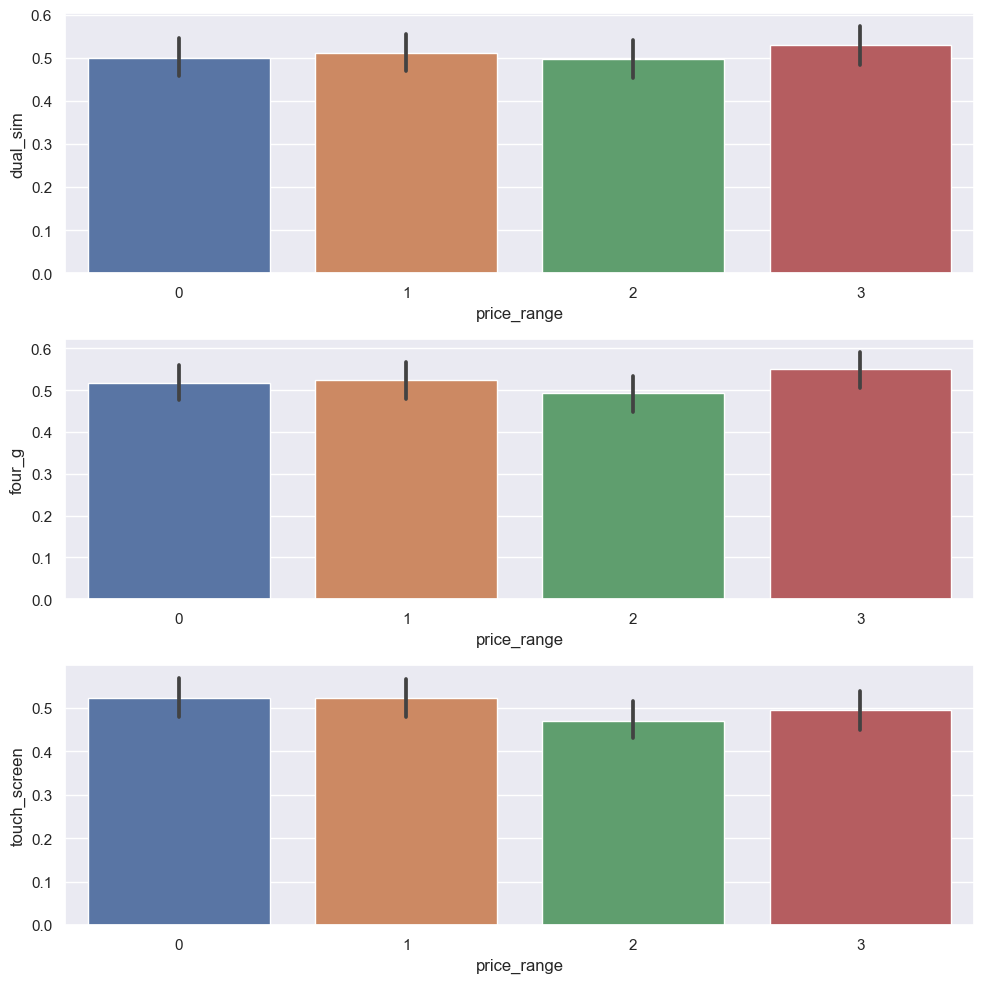

In [86]:
fig, axes = plt.subplots(nrows = 3, figsize = (10, 10),)
sns.set_theme(style='whitegrid',palette='deep',font='sans-serif', font_scale=1,color_codes=True, rc=None)
#Plot for pay_2
sns.barplot(x=df['price_range'],y=df['dual_sim'], ax=axes[0])
#Plot for pay_3
sns.barplot(x=df['price_range'],y=df['four_g'], ax=axes[1])
#Plot for pay_5
sns.barplot(x=df['price_range'],y=df['touch_screen'], ax=axes[2])


plt.tight_layout()

After we not `Exploratory Data Analysys (EDA)` we clean up the data we want to choose as a feature for getting and make sure for an optimal model machine learning we make.

# FEATURES ENGINEERING

After we do `EDA` and find the correlation with `prince_range` now we make of features for a machine learning model. The features are split into two categories: numerical features `numcol` and categorical features `catcol` and we clean up the data like outliers, missing value, any duplicates data. We want to choose as a feature for getting and make sure for an optimal model machine learning we make.

### Split between `X` (Features) and `Y` (Target), and split between Train-Set and Test-Set

splitting a data into training and test sets for a machine learning model. The data has a column `price_range`, which is being removed from the feature set (x) and stored as the target variable (y). The `train_test_split` function is then used to split the data into a training set `x_train, y_train` and a test set `x_test, y_test`

In [87]:
x = df.drop('price_range', axis=1)
y = df['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print('X Train Size : ', x_train.shape)
print('X Test Size  : ', x_test.shape)
print('')
print('Y Train Size : ', y_train.shape)
print('Y Test Size : ', y_test.shape)

X Train Size :  (1400, 22)
X Test Size  :  (600, 22)

Y Train Size :  (1400,)
Y Test Size :  (600,)


### Fature Selection `X` (Features)

the results of our Exploratory Data Analysis, we have chosen the following features for our model: `'battery_power', 'px_height', 'px_width', 'ram' for numerical features, and 'four_g', 'n_cores', 'touch_screen', 'primary_camera', 'front_camera', 'dual_sim'` for categorical features. These features were selected due to their strong correlation with the target variable and their ability to improve the accuracy of our model.


In [88]:
numcol = ['battery_power','px_height','px_width', 'ram']
catcol = ['four_g','n_cores','touch_screen','primary_camera','front_camera','dual_sim']

creating separate DataFrames for the numerical and categorical features in the training set `X_train_num` and `X_train_cat` and the test set `X_test_num` and `X_test_cat` by indexing the original DataFrames `x_train` and `x_test`

In [89]:
X_train_num = x_train[numcol]
X_train_cat = x_train[catcol]

X_test_num = x_test[numcol]
X_test_cat = x_test[catcol]

combines all of the selected `numerical and categorical` features into a single DataFrame that can be used as input for a `machine learning model`. It is creating a dataframe with all the selected features `numerical and categorical` that can be used to train a model. Also, it is creating the `final` dataframe which is used for training the model.

In [90]:
X_train_full = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_full

,battery_power,px_height,px_width,ram,four_g,n_cores,touch_screen,primary_camera,front_camera,dual_sim
1719,833,649,1290,586,1,4,0,4,4,1
1702,1424,181,1199,2658,0,5,0,4,4,1
1287,860,692,979,3869,1,6,1,16,4,1
482,1330,980,1262,463,0,5,0,21,2,1
768,1149,1617,1675,3755,0,6,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...
835,1224,522,563,3796,0,1,1,21,11,0
1216,1158,311,1796,1542,1,2,0,21,4,1
1653,1190,1399,1646,3610,0,5,0,4,4,1
559,1191,179,1813,1028,0,1,1,11,4,1


# EDA MODELING

creating a new dataframe `df_eda`. The shape of the new dataframe is also printed, indicating the number of rows and columns in the dataframe. for EDA modeling

In [91]:
df_eda = pd.concat([x_train, y_train], axis=1)
df_eda.shape

(1400, 23)

### Handling Outliers

based on handling outliers, it appears that our data set is free from outliers. This means that the data points in our set are consistent with the general pattern of the data and do not deviate significantly from the overall distribution. `and so we do nothing with outliers handling`


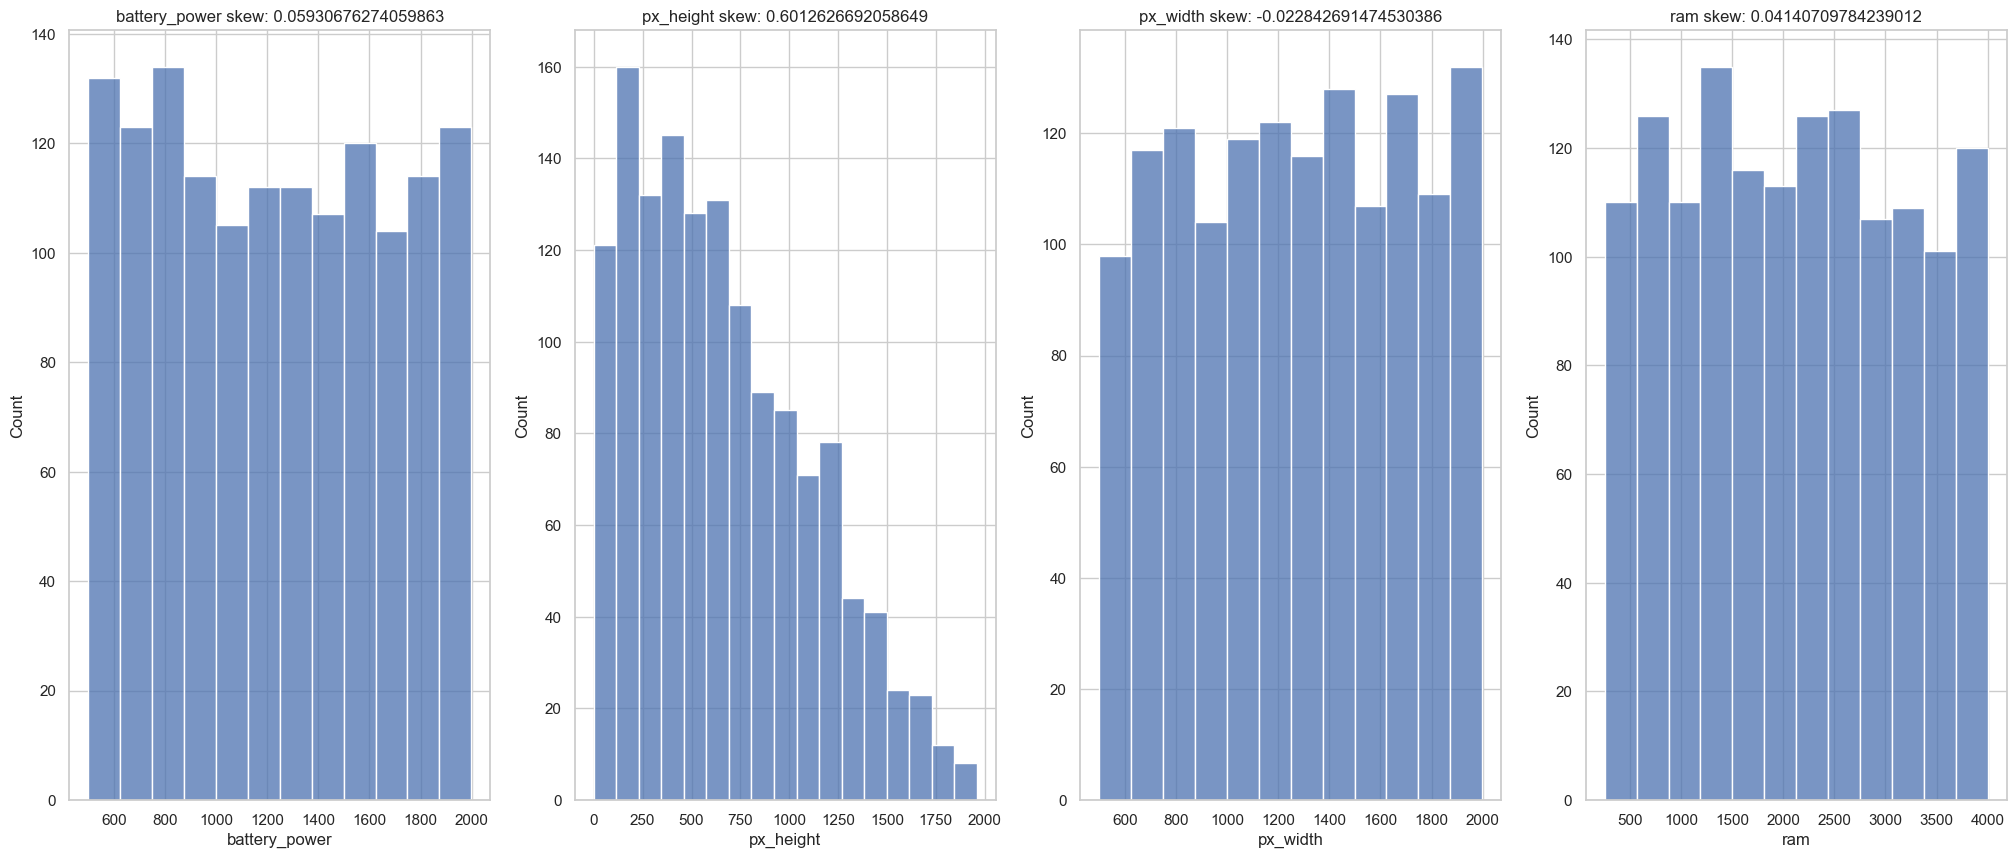

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(numcol):
    sns.histplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{numcol[idx]} skew: {df_eda[col].skew()}')

### No outliers detected on `Ram`

In [93]:
Q3 = df_eda['ram'].quantile(.75)
Q1 = df_eda['ram'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['ram'] > upper) | (df_eda['ram'] < lower)]
print('RAM Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

RAM Outliers
count of outlier:  0
percentage of outlier:  0.0 %


### No outliers detected on `Battery Power`

In [94]:
Q3 = df_eda['battery_power'].quantile(.75)
Q1 = df_eda['battery_power'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['battery_power'] > upper) | (df_eda['battery_power'] < lower)]
print('Battery Power Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

Battery Power Outliers
count of outlier:  0
percentage of outlier:  0.0 %


### No outliers detected on `px_height`

In [95]:
Q3 = df_eda['px_height'].quantile(.75)
Q1 = df_eda['px_height'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['px_height'] > upper) | (df_eda['px_height'] < lower)]
print('px_height Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

px_height Outliers
count of outlier:  0
percentage of outlier:  0.0 %


### No outliers detected on `px_width`

In [96]:
Q3 = df_eda['px_width'].quantile(.75)
Q1 = df_eda['px_width'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['px_width'] > upper) | (df_eda['px_width'] < lower)]
print('px_width Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

px_width Outliers
count of outlier:  0
percentage of outlier:  0.0 %


### Data Missing Value handling

After checking for `missing values`, it was determined that there are `no` missing values in the dataset, so `no further action` is needed to do for this issue.

In [97]:
df_eda[numcol].isnull().sum()

battery_power    0
px_height        0
px_width         0
ram              0
dtype: int64

In [98]:
df_eda[catcol].isnull().sum()

four_g            0
n_cores           0
touch_screen      0
primary_camera    0
front_camera      0
dual_sim          0
dtype: int64

### Duplicated Data

In [99]:
df_eda.duplicated().value_counts()

False    1400
dtype: int64

### Data numerical

We used MinMaxScaler is useful for our data that contain large differences in the scale of different features. and also makes the model more robust to small changes in the data, which can help prevent overfitting.

In [100]:
scaler = MinMaxScaler()

df_eda[numcol] = scaler.fit_transform(df_eda[numcol])
df_eda

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,primary_camera,front_camera,price_range
1719,0.221777,1,0.6,1,0,1,27,0.3,145,4,2,0.331122,0.527370,0.088188,19,8,19,1,0,1,4,4,0
1702,0.616566,1,2.9,1,0,0,20,0.6,180,5,0,0.092347,0.466622,0.641903,15,0,19,1,0,0,4,4,2
1287,0.239813,1,1.3,1,1,1,49,0.7,141,6,13,0.353061,0.319760,0.965526,16,14,20,1,1,1,16,4,3
482,0.553774,1,1.3,1,14,0,3,0.3,83,5,17,0.500000,0.508678,0.055318,14,6,11,0,0,1,21,2,0
768,0.432866,1,2.2,0,4,0,30,0.2,106,6,5,0.825000,0.784379,0.935061,17,14,8,1,0,0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.482966,1,1.6,0,9,0,33,1.0,157,1,18,0.266327,0.042056,0.946018,10,5,13,1,1,0,21,11,3
1216,0.438878,0,0.7,1,1,1,29,0.7,123,2,20,0.158673,0.865154,0.343666,17,9,15,1,0,1,21,4,1
1653,0.460254,0,2.0,1,0,0,40,0.2,93,5,1,0.713776,0.765020,0.896312,13,7,9,0,0,1,4,4,3
559,0.460922,0,2.4,1,2,0,13,0.9,169,1,7,0.091327,0.876502,0.206307,14,6,8,1,1,1,11,4,0


### Data Categorical

The `categorical feature` is already in a `numeric format`, and it does not require any encoding method to be applied. This means that the feature can be used directly in for machine learning model without the need for further processing.

In [101]:
df_eda[catcol]

,four_g,n_cores,touch_screen,primary_camera,front_camera,dual_sim
1719,1,4,0,4,4,1
1702,0,5,0,4,4,1
1287,1,6,1,16,4,1
482,0,5,0,21,2,1
768,0,6,0,4,4,0
...,...,...,...,...,...,...
835,0,1,1,21,11,0
1216,1,2,0,21,4,1
1653,0,5,0,4,4,1
559,0,1,1,11,4,1


# PREPROCESSING PIPELINE

after completing the `ADA modeling`, preprocessing can be done using a `pipeline`. This allows for easy reuse of the preprocessing steps and makes it easy to make changes or updates to the `pipeline` without having to manually apply the same preprocessing steps to different datasets. Additionally, it also make sure that the same preprocessing steps are applied to the test data as to the training data.

applies the MinMaxScaler to the data. The MinMaxScaler is used to normalize the data by transforming the features to a common scale,

In [102]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

test = num_pipeline.fit_transform(x_train[['ram']])
test

array([[0.08818813],
       [0.64190273],
       [0.96552646],
       ...,
       [0.89631213],
       [0.20630679],
       [0.57803314]])

`full_pipeline` for applies different preprocessing methods to different subsets of the features. In this case, the `num_pipeline` pipeline which is already defined is applied to the columns `['battery_power', 'px_height', 'px_width', 'ram']`. The remainder of the columns are passed through without modification.
The full_pipeline is then fit to the X_train_full dataset and the transformed data is stored in the train_tr.

In [103]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['battery_power', 'px_height', 'px_width', 'ram']),

    ],remainder='passthrough')

train_tr = full_pipeline.fit_transform(X_train_full)
train_tr

array([[ 0.22177689,  0.33112245,  0.52736983, ...,  4.        ,
         4.        ,  1.        ],
       [ 0.61656647,  0.09234694,  0.46662216, ...,  4.        ,
         4.        ,  1.        ],
       [ 0.23981296,  0.35306122,  0.31975968, ..., 16.        ,
         4.        ,  1.        ],
       ...,
       [ 0.46025384,  0.71377551,  0.76502003, ...,  4.        ,
         4.        ,  1.        ],
       [ 0.46092184,  0.09132653,  0.876502  , ..., 11.        ,
         4.        ,  1.        ],
       [ 0.13694055,  0.27704082,  0.29238985, ..., 21.        ,
         2.        ,  0.        ]])

In [104]:
full_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['battery_power', 'px_height', 'px_width',
                                  'ram'])])

applies the `full_pipeline` to the `x_test` dataset. It applies the preprocessing step that has already been learned from the `X_train_full` dataset, to the `x_test` dataset.

In [105]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[ 0.63660655,  0.12755102,  0.35580774, ...,  4.        ,
         4.        ,  1.        ],
       [ 0.39478958,  0.23877551,  0.04739653, ..., 16.        ,
        11.        ,  1.        ],
       [ 0.68336673,  0.07857143,  0.03337784, ...,  4.        ,
         4.        ,  1.        ],
       ...,
       [ 0.81496326,  0.44438776,  0.36582109, ...,  4.        ,
         4.        ,  1.        ],
       [ 0.05410822,  0.53214286,  0.8024032 , ..., 11.        ,
        11.        ,  0.        ],
       [ 0.04141617,  0.64438776,  0.811749  , ..., 11.        ,
         4.        ,  1.        ]])

# MODELING

### MODEL DEFINITION

Defines several different models for `classification` tasks using `different algorithms`.

In [106]:
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()

### CROSS VALIDATION

In [107]:
skfold=StratifiedKFold(n_splits=5)

Now we used to evaluate the performance of a `machine learning model`. It is a resampling method that involves dividing the data into several `algorithms model`, training the model on one subset and testing it on the remaining subsets. This process is repeated multiple times with different algorithms model, and the results are averaged to estimate the model's performance on unseen data. and the result show the best model, And it appears that the `Random Forest model` performed the best among all the models.

`Random Forest` is an ensemble method that combines multiple decision trees to improve the model's performance and reduce overfitting. It is known for its high accuracy and ability to handle large datasets with high dimensionality. It also has the advantage of being able to handle missing values and categorical variables, which makes it a versatile model for many types of problems.

In [108]:
# checking cross validation score
cv_log_model = cross_val_score(log_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_svm_model = cross_val_score(svm_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_svm_model = cross_val_score(svm_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_dt_model = cross_val_score(dt_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_rf_model = cross_val_score(rf_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_knn_model = cross_val_score(knn_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_nb_model = cross_val_score(nb_model, train_tr, y_train, cv=skfold, scoring="accuracy")
cv_ada_model = cross_val_score(ada_model, train_tr, y_train, cv=skfold, scoring="accuracy")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.88571429 0.86785714 0.87142857 0.91428571 0.86071429]
recall - Mean - Cross Validation :  0.8800000000000001
recall - Std - Cross Validation  :  0.01897904322226629
recall - Range of Test-Set       :  0.8610209567777338 - 0.8989790432222664
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.3        0.35       0.28928571 0.35714286 0.31785714]
recall - Mean - Cross Validation :  0.32285714285714284
recall - Std - Cross Validation  :  0.026783333227503814
recall - Range of Test-Set       :  0.29607380962963903 - 0.34964047608464666
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.82142857 0.86071429 0.81428571 0.85357143 0.83214286]
recall - Mean - Cross Validation :  0.8364285714285714
recall - Std - Cross Validation  :  0.017985254731448828
recall - Range of Test-Set       :  0.8184433166971226 - 0.8544138261600203
------------------------

# MODEL TRAINING RANDOM FOREST CLASSIFIER

Fitting the best model defined Random Forest model `rf_model` to the training data `train_tr` and the training labels `y_train`.

In [109]:
rf_model.fit(train_tr, y_train)


RandomForestClassifier()

make predictions on new data using the predict() function. the preprocessed training data after fitting the `full_pipeline`. Also, the `y_train` should be the label of the training data, so the model can learn the correlation between the data and the label. In this case, the model has an accuracy of `1.00`, precision of `1.00`, recall of `1.00`, and F1-score of `1.00` for the training dataset, which suggests the model is very good at making predictions for the training data. However, for the test dataset, the accuracy is `0.90`, precision of `0.89`, recall of `0.89` and F1-score of `0.89` which suggests the model is not as good at making predictions for unseen data. This is known as overfitting, so we going to more imporovement for the best performance using hypermarameter tuning `Grid Search and Random Search` and choose the best betweem it.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       151
           1       0.89      0.87      0.88       135
           2       0.87      0.81      0.84       151
           3       0.90      0.94      0.92       163

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Confusion Matrix      : 


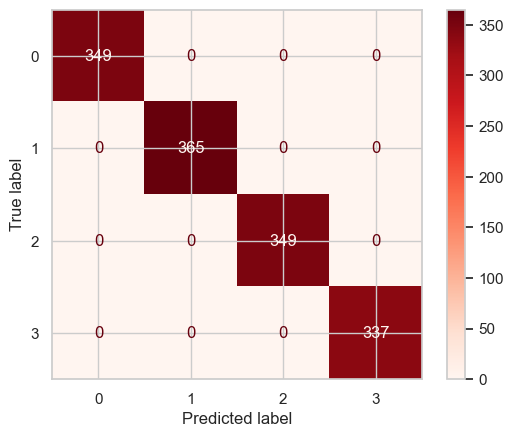

In [110]:
lr_train = rf_model.predict(train_tr)
lr_test = rf_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, train_tr, y_train, cmap='Reds'))

# Hyperparameter Tuning

Tuning these hyperparameters may help the model to generalize better and reduce overfitting

In [111]:
rf_model_tuning = RandomForestClassifier (n_estimators=500,
                                 criterion='entropy',
                                 max_depth=500)
rf_model_tuning.fit(train_tr, y_train)

RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=500)

We can see the `classification report` it looks like the model is performing well, This means that the model is making accurate predictions and is able to identify most of the positive observations. but its still have not aplies `grid search and random search`.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       151
           1       0.88      0.85      0.87       135
           2       0.86      0.83      0.84       151
           3       0.91      0.93      0.92       163

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Confusion Matrix      : 


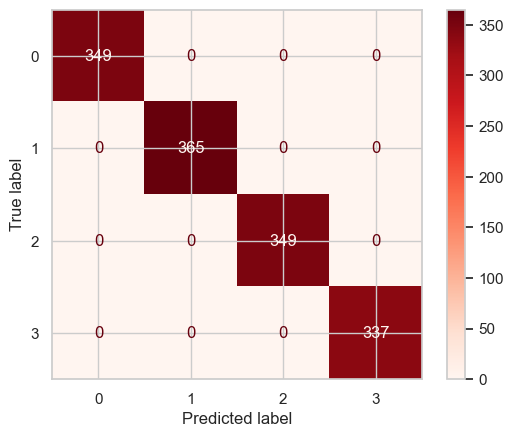

In [112]:
lr_train = rf_model_tuning.predict(train_tr)
lr_test = rf_model_tuning.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, train_tr, y_train, cmap='Reds'))

### Randomized Search

`Randomized search` method is being used to tune the hyperparameters of a Random Forest Classifier model. The specific hyperparameters being tuned are the number of estimators, the maximum features, the maximum depth, the minimum samples split, the minimum samples leaf and the criterion. 

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
rf_randomcv.fit(train_tr, y_train)

In [114]:
rf_randomcv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='recall')

After using the `RandomizedSearchCV` method to tune the hyperparameters of the Random Forest Classifier model, the model has improved in terms of precision, recall and f1-score, both on the training and test sets. The accuracy of the model has also improved on both sets. Therefore, it can be concluded that the hyperparameter tuning of the Random Forest Classifier model has led to an improvement in model performance. but we still havent checking using `Grid Search` if it can do best performace.

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       349
           1       0.92      0.95      0.94       365
           2       0.96      0.94      0.95       349
           3       0.99      0.99      0.99       337

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       151
           1       0.83      0.82      0.83       135
           2       0.84      0.78      0.81       151
           3       0.91      0.94      0.92       163

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.87       600
weighted avg       0.88      0.88      0.88       600

Confusion Matrix      : 


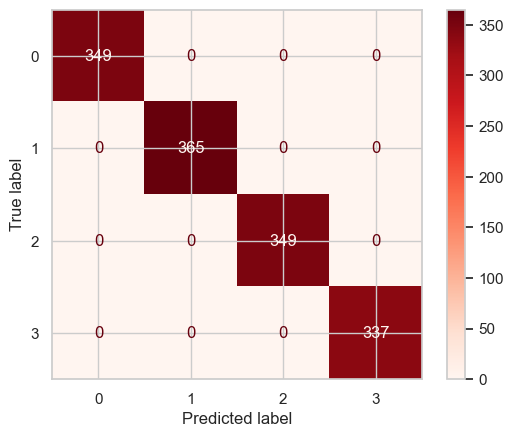

In [115]:
lr_train = rf_randomcv.predict(train_tr)
lr_test = rf_randomcv.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, train_tr, y_train, cmap='Reds'))

### Grid Search

Perform a grid search to tune the hyperparameters of a `random forest classifier`, The `GridSearchCV` function will train and evaluate a random forest model for each combination of hyperparameter values.

In [116]:
params = [
    {'n_estimators': [10, 20, 40, 60],        # 4
     'max_features': [2, 3, 5, 1],            # 4
     'max_depth': [5, 10, None],              # 3
     'criterion': ['gini', 'entropy']},       # 2   Total 4*4*3*2 = 96 combinations
  ]
rf_grid_search = GridSearchCV(rf_model, params, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
rf_grid_search.fit(train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='accuracy')

The results of `grid search` and `random search` are very `similar`. Both have achieved high accuracy and f1-score on the training and validation set. However, it's worth noting that the grid search has a slightly higher accuracy and f1-score on the validation set `0.90` compared to the random search `0.89`. Additionally, `grid search` has a slightly higher `recall` for all classes in the `validation` set. Therefore, it can be concluded that the grid search has found a slightly better set of hyperparameters for the `random forest classifier`.

`Grid Search` is useful when the `search space is small and well defined`, and you have a clear idea of what values you want to try for each parameter. It will give a good idea of how each `parameter setting` affects the performance of your model. In your case, as the grid search result gives you better result, you can use `grid search` over `random search`.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       151
           1       0.89      0.86      0.88       135
           2       0.86      0.84      0.85       151
           3       0.92      0.93      0.92       163

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Confusion Matrix      : 


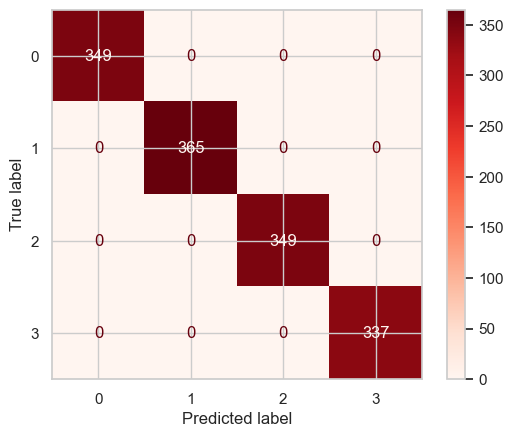

In [117]:
lr_train = rf_grid_search.predict(train_tr)
lr_test = rf_grid_search.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, train_tr, y_train, cmap='Reds'))

# COMBINE PIPELINE WITH BEST MODEL

In [118]:
full_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['battery_power', 'px_height', 'px_width',
                                  'ram'])])

In [119]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", rf_grid_search)
])

all_process.fit(X_train_full, y_train)
hasil = all_process.predict(x_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       151
           1       0.92      0.86      0.89       135
           2       0.87      0.85      0.86       151
           3       0.90      0.93      0.92       163

    accuracy                           0.91       600
   macro avg       0.91      0.90      0.91       600
weighted avg       0.91      0.91      0.91       600



In [120]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['battery_power', 'px_height',
                                                   'px_width', 'ram'])])),
                ('classification',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid=[{'criterion': ['gini', 'entropy'],
                                           'max_depth': [5, 10, None],
                                           'max_features': [2, 3, 5, 1],
                                           'n_estimators': [10, 20, 40, 60]}],
                              return_train_score=True, scoring='accuracy'))])

# CONCLUSION

 
 Based on the `exploratory data analysis (EDA)` performed, it appears that the best correlation for predicting the `price_range` of a smartphone is the amount of `RAM`. This means that the more `RAM` a smartphone has, the higher the `price_range` is likely to be. This correlation is likely due to the fact that more `RAM` allows for better `performance and more advanced features`, which are typically associated with higher-priced devices. And also other features that may also have an impact on the price range of a smartphone include battery power, pixel height and width, the presence of 4G connectivity, number of cores, touch screen, primary and front camera, and dual sim capabilities. However, it's important to note that the correlation between these features and the price range may not be as strong as the correlation between the price range and RAM. Additionally, other factors such as brand and model may also play a role in determining a smartphone's price range. and now our feature have been choosen for modeling

Before we make a model lets do the `cross-validation` and its finding the best `model algorithm performed` and it appears that the `Random Forest model` has the highest score among the `models evaluated`. `Cross-validation` is a technique used to evaluate the performance of a model by training it on different subsets of the data and testing it on the remaining data. A high score on cross-validation suggests that the model is able to generalize well to unseen data.

Next step, for the best performance we get use `RandomizedSearchCV` and `GridSearchCV` can be used to tune the hyperparameters of a `Random Forest model` to improve its performance. The choice between the two methods depends on the specific use case and the available resources. RandomizedSearchCV is generally faster and requires less computational power, but it may not find the optimal set of hyperparameters. `GridSearchCV` is more computationally intensive but it is more likely to find the optimal set of hyperparameters. In this case, both models performed well and achieved high accuracy and recall scores on the test dataset, and either of them can be selected as the final model. but we use `Grid Serach` for our final model.

# MODEL SAVING

In [121]:
with open('all_process', 'wb') as file_1:
  joblib.dump(all_process, file_1)